<a href="https://colab.research.google.com/github/Anirudh1905/Data_Analytics/blob/master/LIK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
tb1=pd.read_excel('/content/drive/My Drive/Colab Notebooks/mle.xlsx')
tb1

,Id,Y,X
0,0,2,1
1,1,6,4
2,2,7,5
3,3,9,6
4,4,15,9


In [7]:
import statsmodels.api as sm
x=tb1['X']
y=tb1['Y']
x2=sm.add_constant(x)
mod1=sm.OLS(y,x2).fit()
mod1.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     145.9
Date:                Tue, 10 Mar 2020   Prob (F-statistic):            0.00122
Time:                        13:39:02   Log-Likelihood:                -4.5811
No. Observations:                   5   AIC:                             13.16
Df Residuals:                       3   BIC:                             12.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2882      0.755     -0.382      0.728      -2.692       2.115
X              1.6176      0.134     12.079      0.001       1.191       2.044
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.405
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.551
Skew:                           0.089   Prob(JB):                        0.759
Kurtosis:                       1.384   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
e=mod1.resid
e

0    0.670588
1   -0.182353
2   -0.800000
3   -0.417647
4    0.729412
dtype: float64

In [9]:
np.std(e)

0.6048820983804829

In [0]:
def lik(parameters):
  m=parameters[0]
  b=parameters[1]
  sigma=parameters[2]
  for i in np.arange(0,len(x)):
    y_exp=m*x+b
    L=(len(x)/2 * np.log(2*np.pi) + len(x)/2 * np.log(sigma**2) +1 / (2* sigma **2)* sum((y-y_exp)**2))
  return L

In [11]:
lik_model=minimize(lik,np.array([2,2,2]),method='L-BFGS-B')
lik_model

      fun: 4.581084072760692
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.15143483e-06,  3.55271368e-07, -2.66453526e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 112
      nit: 19
   status: 0
  success: True
        x: array([ 1.61764707, -0.2882353 ,  0.604882  ])

In [12]:
lik_model.x

array([ 1.61764707, -0.2882353 ,  0.604882  ])

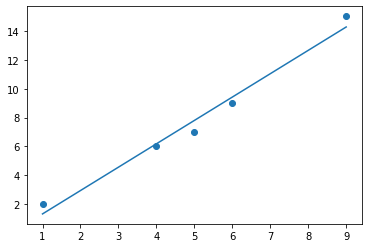

In [13]:
plt.scatter(x,y)
plt.plot(x,lik_model['x'][0] * x + lik_model['x'][1])
plt.show()